In [1]:
from ncNet import ncNet
from vega import VegaLite

<big> <strong>Initialize the ncNet by specify the trained model path.</strong> </big>

In [2]:
ncNet = ncNet(
    trained_model= './save_models/trained_model.pt'
)

/Users/yuyu/anaconda3/lib/python3.8/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/Users/yuyu/anaconda3/lib/python3.8/site-packages/torchtext/data/example.py:68: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.', UserWarning)
/Users/yuyu/anaconda3/lib/python3.8/site-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release note

<big> <strong>Example 1</strong> </big>

three types of dataset: sqlite3, csv, json

In [3]:
# The data type must be one of the csv, json, sqlite3, or a DataFrame object.
ncNet.specify_dataset(
    data_type='sqlite3',
    db_url='./dataset/database/car_1/car_1.sqlite',
    table_name='cars_data'
)

In [20]:
ncNet.show_dataset(top_rows=3) # top_rows: default 5

,name,miles_per_gallon,cylinders,displacement,horsepower,weight_in_lbs,acceleration,year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA


<b>ncNet with an NL query, without a chart template</b>

[NL Question]: What is the average weight and year for each year. Plot them as line chart.
[Chart Template]: None
[Predicted VIS Query]: mark line data cars_data encoding x year y aggregate mean weight transform group x


/Users/yuyu/anaconda3/lib/python3.8/site-packages/py_stringsimjoin/utils/generic_helper.py:76: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  projected_dataframe = dataframe[proj_attrs].dropna(0,


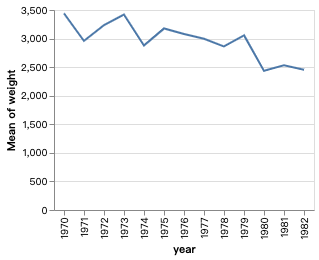

In [5]:
ncNet.nl2vis(
    nl_question='What is the average weight and year for each year. Plot them as line chart.',
    show_progress = False
)[0] # nl2vis will return a list a [Vis, VegaLiteSpec]

[NL Question]: how many cars by year
[Chart Template]: None
[Predicted VIS Query]: mark line data cars_data encoding x year y aggregate count year transform group x


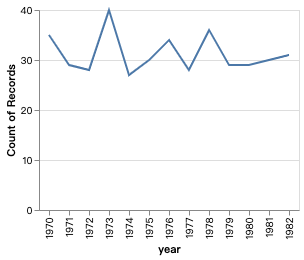

In [6]:
ncNet.nl2vis(
    nl_question='how many cars by year',
    chart_template=None
)[0] # nl2vis will return a list a [Vis, VegaLiteSpec]

<b>ncNet with an NL query and a chart template</b>

[NL Question]: how many cars by year
[Chart Template]: {'chart': 'bar', 'sorting_options': {'axis': 'y', 'type': 'asc'}}
[Predicted VIS Query]: mark bar data cars_data encoding x year y aggregate count year transform group x sort y asc


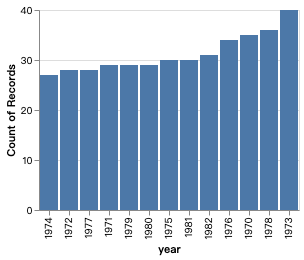

In [7]:
ncNet.nl2vis(
    nl_question='how many cars by year',
    chart_template={
        'chart': 'bar',
        'sorting_options': {
            'axis': 'y',
            'type': 'asc'
        }
    }
)[0] # nl2vis will return a list a [Vis, VegaLiteSpec]

<big> <strong>Example 2</strong> </big>

In [8]:
ncNet.specify_dataset(
    data_type = 'json',
    table_name = 'cars_dataset',
    data_url = 'https://vega.github.io/vega-lite/examples/data/cars.json' # from a remote json url
)

In [9]:
ncNet.show_dataset()

,name,miles_per_gallon,cylinders,displacement,horsepower,weight_in_lbs,acceleration,year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


[NL Question]: count origin in a bar chart
[Chart Template]: None
[Predicted VIS Query]: mark bar data cars_dataset encoding x origin y aggregate count origin transform group x


/Users/yuyu/anaconda3/lib/python3.8/site-packages/py_stringsimjoin/utils/generic_helper.py:76: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  projected_dataframe = dataframe[proj_attrs].dropna(0,


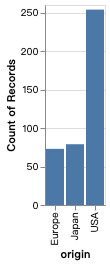

In [10]:
ncNet.nl2vis("count origin in a bar chart")[0]

[NL Question]: count origin in a pie chart
[Chart Template]: None
[Predicted VIS Query]: mark arc data cars_dataset encoding x origin y aggregate count origin transform group x


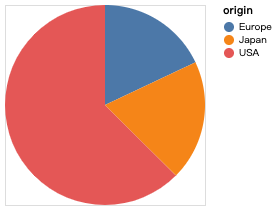

In [11]:
ncNet.nl2vis("count origin in a pie chart")[0]

[NL Question]: count year
[Chart Template]: None
[Predicted VIS Query]: mark bar data cars_dataset encoding x year y aggregate count year transform group x


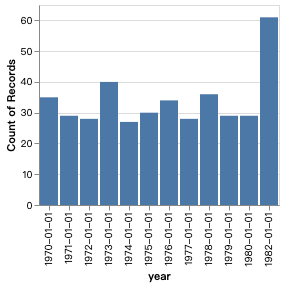

In [12]:
ncNet.nl2vis("count year")[0]

[NL Question]: show the proportion of #-cars by origin
[Chart Template]: None
[Predicted VIS Query]: mark arc data cars_dataset encoding x origin y aggregate count origin transform group x


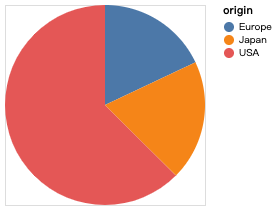

In [13]:
ncNet.nl2vis("show the proportion of #-cars by origin")[0]

[NL Question]: show the distrition by origin
[Chart Template]: None
[Predicted VIS Query]: mark bar data cars_dataset encoding x origin y aggregate count origin transform group x


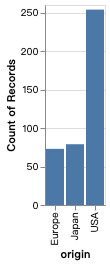

In [14]:
ncNet.nl2vis('show the distrition by origin')[0] # example NL question from NL4DV

[NL Question]: show a line chart of horsepower over the years
[Chart Template]: None
[Predicted VIS Query]: mark line data cars_dataset encoding x year y aggregate count year transform group x


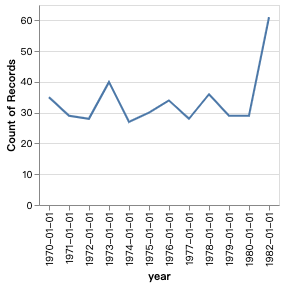

In [15]:
ncNet.nl2vis("show a line chart of horsepower over the years")[0] # wrong answer!

[NL Question]: show me the trend about mean acceleration over the years
[Chart Template]: {'chart': 'bar', 'sorting_options': {'axis': 'y', 'type': 'desc'}}
[Predicted VIS Query]: mark bar data cars_dataset encoding x year y aggregate mean acceleration transform group x sort y desc


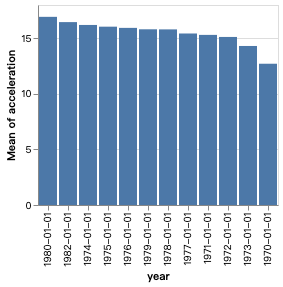

In [16]:
ncNet.nl2vis(
    "show me the trend about mean acceleration over the years",
    chart_template={
        'chart': 'bar',
        'sorting_options':{
            "axis": 'y',
            "type": 'desc'
        }
    }
)[0]

[NL Question]: show me the trend about mean acceleration over the years
[Chart Template]: None
[Predicted VIS Query]: mark line data cars_dataset encoding x year y aggregate mean acceleration transform group x


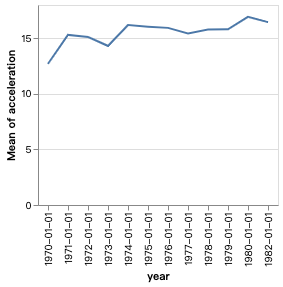

In [17]:
ncNet.nl2vis("show me the trend about mean acceleration over the years")[0]

[NL Question]: Create a point chart to show the year and miles_per_gallon
[Chart Template]: None
[Predicted VIS Query]: mark point data cars_dataset encoding x miles_per_gallon y aggregate count year transform group x


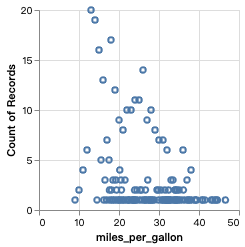

In [18]:
ncNet.nl2vis("Create a point chart to show the year and miles_per_gallon")[0] # Ambiguity Query!


[NL Question]: show a chart, group by year and count accelar
[Chart Template]: None
[Predicted VIS Query]: mark bar data cars_dataset encoding x year y aggregate count year transform group x


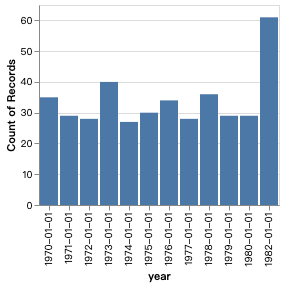

In [19]:
ncNet.nl2vis("show a chart, group by year and count accelar")[0] # wrong VIS Query, but Right VIS Result!